# Face identification problem

**Task**
Challenge yourself with image classification task for solving face identification problem on ORL dataset available here.

**Goal**
The aim of this project is listed (but not limited to) below:
    - Familiarize yourself with EDA (Exploratory Data Analysis) technique on the concrete example with dataset of people’ faces.
    - Implement simplest classification algorithm with Python language.
    - Investigate general techniques of normalization and optimization.
    - Experience yourself in report with detailed explanation of applied strategy and the achieved results.
You can familiarize yourself with the common methods in CV (Computer Vision), image processing, and face recognition on the example here.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as PGM

%matplotlib inline

In [2]:
# model const & parameters 
faces_folder = 'att_faces/'
person_count = 40
faces_count = 10
train_percent = 80.0

faces_count_train = round (faces_count * train_percent / 100)
faces_count_verif = faces_count - faces_count_train
print ("Train faces count = " + str(faces_count_train))
print ("Verif faces count = " + str(faces_count_verif))

Train faces count = 8
Verif faces count = 2


In [3]:
def load_datasets ():
    Xt, Yt, Xv, Yv = ([], [], [], [])
    for person in range(person_count):
        for faces in range(faces_count):
            file_name = faces_folder + "s" + str(person+1) + "/" + str(faces+1) + ".pgm"
            img = np.array(PGM.open(file_name))
            if (faces < faces_count_train):
                Xt.append(img)
                Yt.append(person+1)
            else:
                Xv.append(img)
                Yv.append(person+1)
    return np.asarray(Xt), np.asarray(Yt), np.asarray(Xv), np.asarray(Yv)

def vector_to_image(vector):
    image = vector.reshape(112,92)
    return image

def image_display (x,y,idx):
    image = vector_to_image(x[idx])
    plt.imshow(image, cmap='hot')
    plt.title("id = " + str(y[idx]))

In [4]:
# Loading the data (faces)
X_train_orig, Y_train_orig, X_verif_orig, Y_verif_orig = load_datasets()

In [5]:
print ("X_train_orig shape: " + str(X_train_orig.shape))
print ("Y_train_orig shape: " + str(Y_train_orig.shape))
print ("X_verif_orig shape: " + str(X_verif_orig.shape))
print ("Y_verif_orig shape: " + str(Y_verif_orig.shape))

X_train_orig shape: (320, 112, 92)
Y_train_orig shape: (320,)
X_verif_orig shape: (80, 112, 92)
Y_verif_orig shape: (80,)


In [6]:
# RESHAPE
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_verif = X_verif_orig.reshape(X_verif_orig.shape[0], -1)
Y_train = Y_train_orig
Y_verif = Y_verif_orig

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_verif shape: " + str(X_verif.shape))
print ("Y_verif shape: " + str(Y_verif.shape))
print ("sanity check after reshaping: ")
print (X_train_orig[10, 0, 0:5])
print (X_train[10, 0:5])

X_train shape: (320, 10304)
Y_train shape: (320,)
X_verif shape: (80, 10304)
Y_verif shape: (80,)
sanity check after reshaping: 
[30 37 35 33 35]
[30 37 35 33 35]


In [7]:
def norm_basic(A):
    return A/255.

def norm_mean(A, ax=0):
    return A - A.mean(axis=ax, keepdims=True)

def norm_mean_std(A, ax=0):
    return (A - A.mean(axis=ax, keepdims=True)) / A.std(axis=ax, keepdims=True)

def norm_min_max(A, ax=0):
    return 2 * (A - A.min(axis=ax, keepdims=True)) / (A.max(axis=ax, keepdims=True) - A.min(axis=ax, keepdims=True)) - 1

Для каждого из тестовых изображений лиц [80] посчитать MSE для изображений из train set [320], в результате чего будет получен вектор из 320-и значений. 
Затем, найти индекс миинмального значения в этом векторе и по этому индексу достать из вектора Y (который будет содержать индексы пользователей) id пользователя и сравнить с настоящим id, который хранится в векторе y из 80 элементов

mse = ((A - B)^2).mean(axis=ax)
mse = (np.square(A - B)).mean(axis=ax)
with ax=0 the average is performed along the row, for each column, returning an array
with ax=1 the average is performed along the column, for each row, returning an array
with ax=None the average is performed element-wise along the array, returning a scalar value

In [8]:
def get_euclid_dist(A, B):
    return np.sqrt(np.sum((A - B)**2, axis=1))

# check
A = np.full((6,2),1)
B = np.full((4,2),2)
C = get_euclid_dist(A[0], B)
D = get_euclid_dist(A, B[0])
print(C)
print(D)

A = np.array([[1,2], [2,3], [3,4], [4,5], [5,6], [6,7]])
B = np.array([[1,1], [2,2], [3,3]])
C = get_euclid_dist(B[0], A)
print(C)

[1.41421356 1.41421356 1.41421356 1.41421356]
[1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356]
[1.         2.23606798 3.60555128 5.         6.40312424 7.81024968]


In [9]:
def model_fid_euclid (Xt, Yt, Xv, Yv):
    Yp = np.zeros(Yv.shape[0])
    matches = np.zeros(Yv.shape[0])
    for i in range(Xv.shape[0]):          # for each verif vector [80] 
        mse = get_euclid_dist(Xv[i], Xt)  # calc MSE [320] (distance between verif vector and all of the train vectors)
        Yp[i] = Yt[np.argsort(mse)[0]]    # predicted values
        matches[i] = (Yp[i] == Yv[i])
    return matches

In [10]:
display_image_number = 5

Accuracy:  0.95
Wall time: 2.77 s


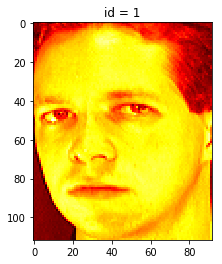

In [11]:
%%time

# without norm
X_train = X_train / 1.0
X_verif = X_verif / 1.0
image_display(X_train, Y_train, display_image_number)

# model
matches = model_fid_euclid (X_train, Y_train, X_verif, Y_verif)
print ("Accuracy: ", matches.mean()) 

Accuracy:  0.95
Wall time: 2.54 s


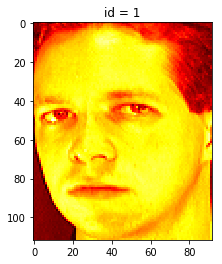

In [12]:
%%time

# norm_basic (/ 255)
X_train_norm = norm_basic(X_train)
X_verif_norm = norm_basic(X_verif)
image_display(X_train_norm, Y_train, display_image_number)

# model
matches = model_fid_euclid (X_train_norm, Y_train, X_verif_norm, Y_verif)
print ("Accuracy: ", matches.mean()) 

Accuracy:  0.9375
Wall time: 2.54 s


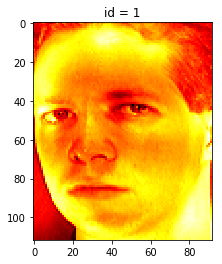

In [13]:
%%time

# norm_mean (by feature axis 0)
X_train_norm = norm_mean(X_train,0)
X_verif_norm = norm_mean(X_verif,0)
image_display(X_train_norm, Y_train, display_image_number)

# model
matches = model_fid_euclid (X_train_norm, Y_train, X_verif_norm, Y_verif)
print ("Accuracy: ", matches.mean()) 

Accuracy:  0.9375
Wall time: 2.62 s


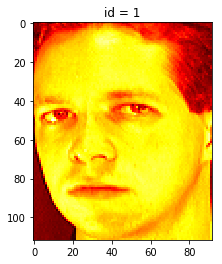

In [14]:
%%time

# norm_mean (by sample axis 1)
X_train_norm = norm_mean(X_train,1)
X_verif_norm = norm_mean(X_verif,1)
image_display(X_train_norm, Y_train, display_image_number)

# model
matches = model_fid_euclid (X_train_norm, Y_train, X_verif_norm, Y_verif)
print ("Accuracy: ", matches.mean()) 

Accuracy:  0.9375
Wall time: 2.67 s


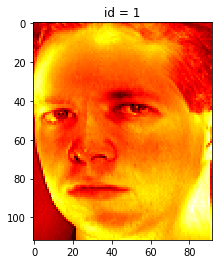

In [15]:
%%time

# norm_mean_std (by feature axis 0)
X_train_norm = norm_mean_std(X_train,0)
X_verif_norm = norm_mean_std(X_verif,0)
image_display(X_train_norm, Y_train, display_image_number)

# model
matches = model_fid_euclid (X_train_norm, Y_train, X_verif_norm, Y_verif)
print ("Accuracy: ", matches.mean()) 

Accuracy:  0.9375
Wall time: 2.61 s


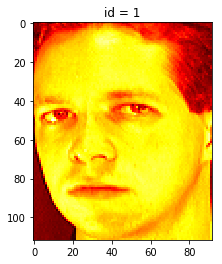

In [16]:
%%time

# norm_mean_std (by sample axis 1)
X_train_norm = norm_mean_std(X_train,1)
X_verif_norm = norm_mean_std(X_verif,1)
image_display(X_train_norm, Y_train, display_image_number)

# model
matches = model_fid_euclid (X_train_norm, Y_train, X_verif_norm, Y_verif)
print ("Accuracy: ", matches.mean()) 

Accuracy:  0.9625
Wall time: 2.62 s


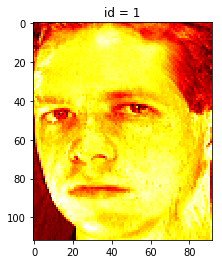

In [17]:
%%time

# norm_min_max (by feature axis 0)
X_train_norm = norm_min_max(X_train,0)
X_verif_norm = norm_min_max(X_verif,0)
image_display(X_train_norm, Y_train, display_image_number)

# model
matches = model_fid_euclid (X_train_norm, Y_train, X_verif_norm, Y_verif)
print ("Accuracy: ", matches.mean()) 

Accuracy:  0.9375
Wall time: 2.62 s


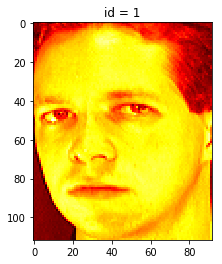

In [18]:
%%time

# norm_min_max (by sample axis 1)
X_train_norm = norm_min_max(X_train,1)
X_verif_norm = norm_min_max(X_verif,1)
image_display(X_train_norm, Y_train, display_image_number)

# model
matches = model_fid_euclid (X_train_norm, Y_train, X_verif_norm, Y_verif)
print ("Accuracy: ", matches.mean()) 